In [128]:
#!/usr/bin/python3

from helper import *
import re
import math
import numpy as np
from itertools import combinations
from itertools import product
import time
%matplotlib inline

waves=["D2-", "D1-", "D0+", "D1+", "D2+","pD2-", "pD1-", "pD0+", "pD1+", "pD2+"] # will tack on reflectivity later

def loadResults(fitFile,dump=False):
    with open(fitFile) as f:
        lines=f.readlines()
        cfgFirstLine=[i for i,v in enumerate(lines) if "## FIT CONFIGURATION ###" in v][0]
        fitResultLine=[i for i,v in enumerate(lines) if "+++ Parameter Values and Errors +++" in v][0]
        cfg=lines[cfgFirstLine+1:]
        fitresults=lines[fitResultLine:cfgFirstLine+1]
        fitresults=[re.sub(r" +","",line).rstrip().lstrip() for line in fitresults]
        # make sure the line is a parameterName and value that is separated by a tab
        fitresults=[line.split("\t") for line in fitresults if (len(line.split("\t"))==2)&(~line[0].isdigit())] 
        fitMap={k:float(v) for k,v in fitresults}
        if dump:
            for k,v in fitMap.items():
                print(f'{k} {v}')
        return fitMap

def extractRTheta(fitMap,dump=False):
    # prototype to search for: EtaPi0_000::NegativeRe::D0+-_re
    reaction="EtaPi0_000"
    part="Re"
    refls=["Positive","Negative"]
    phaseMap={}
    magMap={}
    for refl in refls:
        e='+' if refl=='Positive' else '-'
        for wave in waves:
            prefix=f'{reaction}::{refl}{part}::{wave}{e}_'
            if prefix+'re' not in fitMap.keys():
                magMap[wave+e]=0
                phaseMap[wave+e]=0
            else:
                cartesian=fitMap[prefix+'re']+1j*fitMap[prefix+'im']
                r, theta = abs(cartesian), np.angle(cartesian)
                magMap[wave+e]=r
                phaseMap[wave+e]=theta
        if dump:
            for map1, label in zip([magMap,phaseMap],['Magnitudes','Phases']):
                print(f' ***** {label} *****')
                for k,v in map1.items():
                    print(f'{k}: {v}')
                print()
    return magMap, phaseMap


def mergeMaps(listOfMaps):
    for i in range(1,len(listOfMaps)):
        assert( listOfMaps[0].keys()==listOfMaps[i].keys() )
    merged={}
    for map1 in listOfMaps:
        for k,v in map1.items():
            if k not in merged.keys():
                merged[k]=[v]
            else:
                merged[k].append(v)
    return merged

def plotData(x,y,ax,c):
    x=np.array(x)
    y=np.array(y)

    # i refers to the starting/reference point
    for i in range(math.ceil(len(x)/2)):
        # j is the candidate nearest point(forward/backward)
        ## LOOP 1: Goes in the forward direction
        for j in range(i,math.ceil(len(x)/2)):
            if x[j]>x[i]:
                ax.plot([x[i],x[j]],[y[i],y[j]], linestyle='-', c=c)
                break
        ## LOOP 2: Goes in the backward direction.
        for j in range(i,math.ceil(len(x)/2)):
            ii=len(x)-i-1
            jj=len(x)-j-1
            if x[ii]>x[jj]:
                ax.plot([x[ii],x[jj]],[y[ii],y[jj]], linestyle='-', c=c)
                break
                
def distance(x,ys):
    '''
    Total distance
    x is shared amongst all ys, its distance will be broadcasted to match is shape
    '''
    return np.sqrt((x[1:]-x[:-1])**2+(ys[:,1:]-ys[:,:-1])**2).sum(axis=1) #distances

def flip(x):
    '''
    N*pi shifts
    '''
    if x<0:
        return x+2*3.14159 # add 2pi
    else:
        return x-2*3.14159 # subtract 2pi
    
vflip=np.vectorize(flip)

#######################################################################

folder='systematic_nominal_v9/precision_of_NLL/v1/nominal/'

prettyMap={
        "D2--":r'$D_{-2}$',
        "D1--":r'$D_{-1}$',
        "D0+-":r'$D_{0}$',
        "D1+-":r'$D_{1}$',
        "D2+-":r'$D_{2}$',
        "pD2--":r'$D_{-2}$',
        "pD1--":r'$D_{-1}$',
        "pD0+-":r'$D_{0}$',
        "pD1+-":r'$D_{1}$',
        "pD2+-":r'$D_{2}$',
        "D2-+":r'$D_{-2}$',
        "D1-+":r'$D_{-1}$',
        "D0++":r'$D_{0}$',
        "D1++":r'$D_{1}$',
        "D2++":r'$D_{2}$',
        "pD2-+":r'$D_{-2}$',
        "pD1-+":r'$D_{-1}$',
        "pD0++":r'$D_{0}$',
        "pD1++":r'$D_{1}$',
        "pD2++":r'$D_{2}$',
        }

input_ts=[]
input_fits=[]
for it,t in enumerate(ts):
    for fit in glob.glob(f'{folder}/{t}/etapi_result_*.fit'):
        input_fits.append(fit)
        input_ts.append(midts[it])

print(" **** SOURCE FILES ****")
for fit,t in zip(input_fits,input_ts):
    print(f't={t}: {fit}')
print()

magMaps=[]
phaseMaps=[]
for i in range(len(input_fits)):
    fitMap=loadResults(input_fits[i])
    magMap, phaseMap = extractRTheta(fitMap)
    magMaps.append(magMap)
    phaseMaps.append(phaseMap)

merged=mergeMaps(phaseMaps)

 **** SOURCE FILES ****
t=0.15: systematic_nominal_v9/precision_of_NLL/v1/nominal//010020/etapi_result_0.fit
t=0.15: systematic_nominal_v9/precision_of_NLL/v1/nominal//010020/etapi_result_1.fit
t=0.2625: systematic_nominal_v9/precision_of_NLL/v1/nominal//0200325/etapi_result_0.fit
t=0.4125: systematic_nominal_v9/precision_of_NLL/v1/nominal//0325050/etapi_result_0.fit
t=0.625: systematic_nominal_v9/precision_of_NLL/v1/nominal//050075/etapi_result_0.fit
t=0.875: systematic_nominal_v9/precision_of_NLL/v1/nominal//075100/etapi_result_0.fit
t=0.875: systematic_nominal_v9/precision_of_NLL/v1/nominal//075100/etapi_result_1.fit



## Version 0, pi and -pi not connected

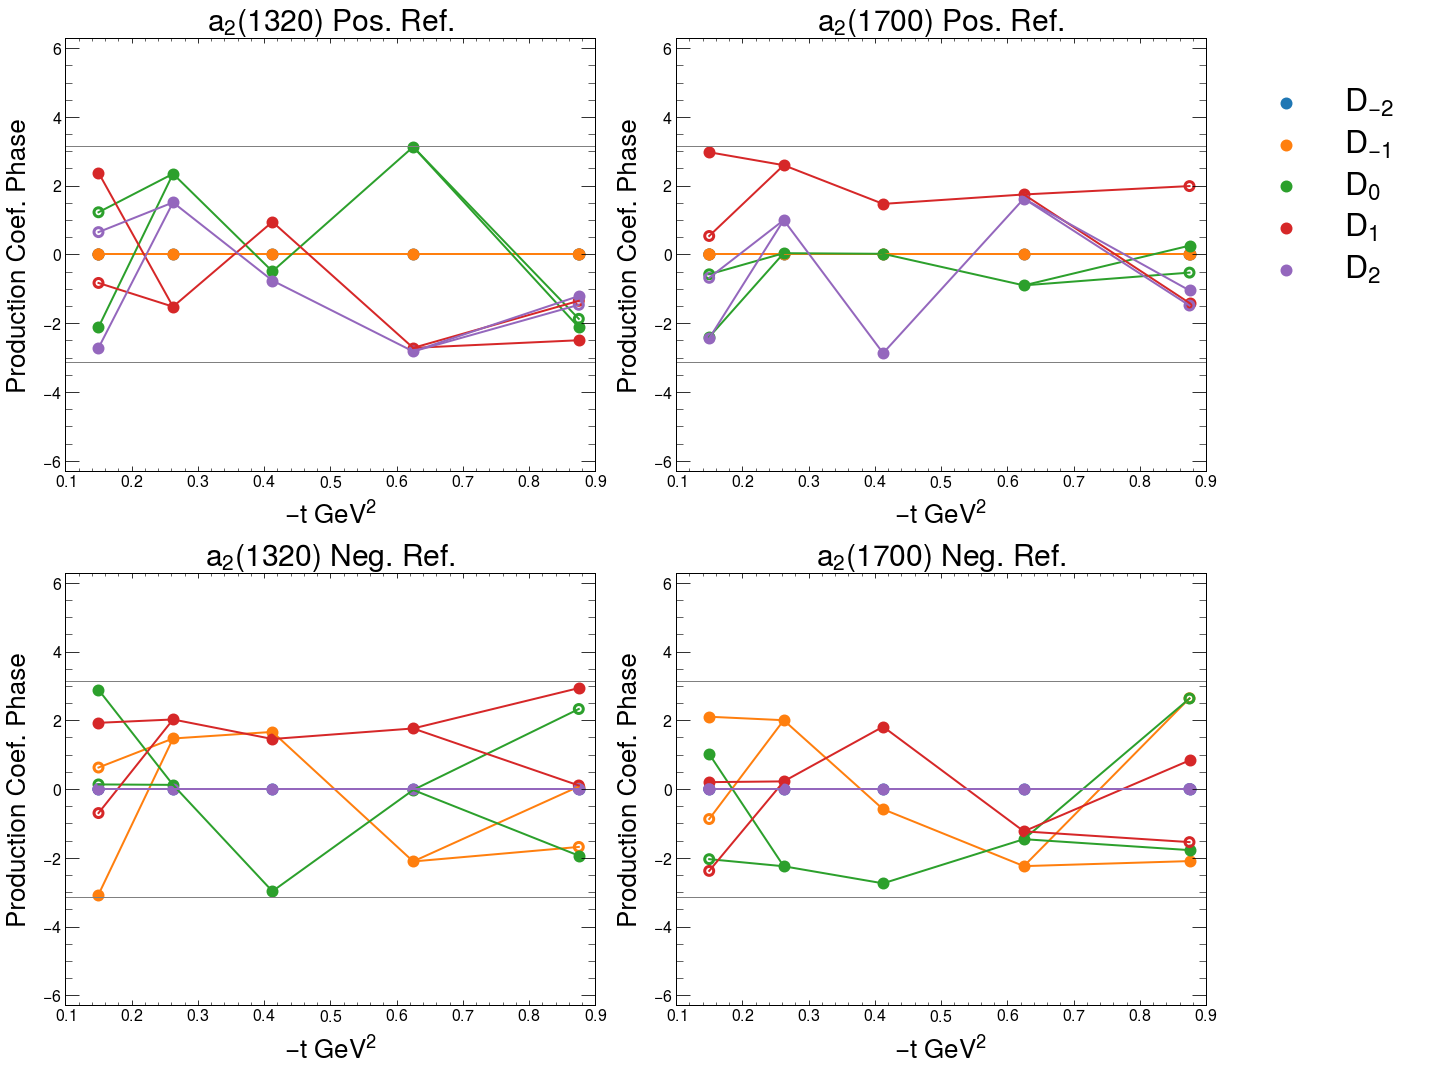

In [169]:
fig,ax=plt.subplots(2,2,figsize=(20,15))

cs=plt.rcParams['axes.prop_cycle'].by_key()['color']
cmap={}
ic=0
fitIterations=[int(fit.split('.')[0].split('_')[-1]) for fit in input_fits]
for k,v in merged.items():
#     if k!='D0++':
#         continue
    reducedAmp=k.lstrip('p')[:3]
    if reducedAmp not in cmap.keys():
        cmap[reducedAmp]=cs[ic]
    icol = 1 if k.startswith('p') else 0
    irow = 1 if k.endswith('-') else 0
    plotData(input_ts,v,ax[irow,icol],c=cmap[reducedAmp])

    kwarg_map={0:{'marker':'o','facecolor':cmap[reducedAmp]}, 1:{'marker':'o','facecolor':'none'}}
    for x,y,i,p in zip(input_ts,v,fitIterations,range(len(input_ts))):
        label=prettyMap[k] if p==0 else ''
        ax[irow,icol].scatter(x,y,edgecolor=cmap[reducedAmp],linewidths=3,label=label,s=80, **kwarg_map[i])
    ic+=1

for irow, rlabel in enumerate(['Pos. Ref.','Neg. Ref.']):
    for icol, clabel in enumerate([r'$a_2(1320)$',r'$a_2(1700)$']):
        ax[irow,icol].set_xlabel(r'$-t$ $GeV^2$',size=26)
        ax[irow,icol].set_ylabel('Production Coef. Phase',size=26)
        ax[irow,icol].set_title(f'{clabel} {rlabel}',size=30)
        ax[irow,icol].set_ylim(-2*np.pi,2*np.pi)
        ax[irow,icol].axhline(np.pi,c='gray',linewidth=1)
        ax[irow,icol].axhline(-np.pi,c='gray',linewidth=1)
ax[0,1].legend(prop={'size':32},bbox_to_anchor=(1,1))

plt.tight_layout()
plt.savefig('drawProductionCoeffs_v0.png')

## Version 1, pi and -pi is connected

In [170]:
## Fit iteration=0 is the nominal. Successive fits are sorted worse
fitIterations=[int(fit.split('.')[0].split('_')[-1]) for fit in input_fits]
altFitIndicies=set(np.where(np.array(fitIterations)!=0)[0])

### Get all combinations of indicies where each unique x value is used once
# i.e. [0.15, 0.15, 0.2625, 0.4125, 0.625, 0.875, 0.875]
# [0,2,3,4,5] and [1,2,3,4,5] are 2 potential outputs since 0.15 is used twice
grouped_indices=pd.Series(range(len(input_ts))).groupby(input_ts, sort=False).apply(list).tolist()
choices=[]
for item in product(*grouped_indices):
    choices.append(list(item))

In [179]:
y=merged['D2++']
combos_of_all_sizes=[]
for i in range(1, len(y)+1):
    combos_of_size_i = list(combinations(range(len(y)), i))
    combos_of_all_sizes+=combos_of_size_i

In [182]:
def drawPhase(wave,choice,usedMinDistances,includeLabel=False):
    usingAltFits=bool(set(choice)&altFitIndicies)
    ls='dotted' if usingAltFits else 'solid'
    
    x=np.array(input_ts)[choice]
    y=np.array(merged[wave])[choice]
    reducedAmp=wave.lstrip('p')[:3]

    ### Find all combinations of flips
    combos_of_all_sizes=[]
    for i in range(1, len(y)+1):
        combos_of_size_i = list(combinations(range(len(y)), i))
        combos_of_all_sizes+=combos_of_size_i
        
#     print(f'Number of combos considered: {len(combos_of_all_sizes)}')
    
    # Repeat the y vector #combos times
    # Apply the flip combinatorics to each row
    # +1 to include room for the no flip case
    ys=y[np.newaxis,:].repeat(len(combos_of_all_sizes)+1,axis=0)
    for i,combos_of_size_i in enumerate(combos_of_all_sizes):
        ys[i+1][list(combos_of_size_i)]=vflip(ys[i+1][list(combos_of_size_i)])
    
    # Determine distances
    distances=distance(x,ys)
    
    # Plot phases
    icol = 1 if wave.startswith('p') else 0
    irow = 1 if wave.endswith('-') else 0
    
    minDistance=np.min(distances)
    
    if irow==1 and icol==0:
        print(wave,minDistance, usedMinDistances)
    
    if minDistance not in usedMinDistances:
        ax[irow,icol].plot(x,ys[np.argmin(distances)],c=cmap[reducedAmp],linestyle=ls)
        label=prettyMap[wave] if includeLabel else ''
        ax[irow,icol].scatter(x,ys[np.argmin(distances)],c=cmap[reducedAmp],linewidths=3,label=label,s=80, marker='o')
    
    return minDistance

D2-- 0.725 set()
D2-- 0.725 {0.725}
D2-- 0.725 {0.725}
D2-- 0.725 {0.725}
D1-- 6.707208266698926 set()
D1-- 5.0049800743446635 {6.707208266698926}
D1-- 5.813125053472566 {5.0049800743446635, 6.707208266698926}
D1-- 4.110896861118303 {5.813125053472566, 5.0049800743446635, 6.707208266698926}
D0+- 10.747769772860291 set()
D0+- 11.188063723725039 {10.747769772860291}
D0+- 8.093036707561396 {10.747769772860291, 11.188063723725039}
D0+- 8.533330658426145 {8.093036707561396, 10.747769772860291, 11.188063723725039}
D1+- 2.3105825421443784 set()
D1+- 2.786467670784524 {2.3105825421443784}
D1+- 4.8857916505739905 {2.3105825421443784, 2.786467670784524}
D1+- 5.361676779214136 {2.3105825421443784, 2.786467670784524, 4.8857916505739905}
D2+- 0.725 set()
D2+- 0.725 {0.725}
D2+- 0.725 {0.725}
D2+- 0.725 {0.725}


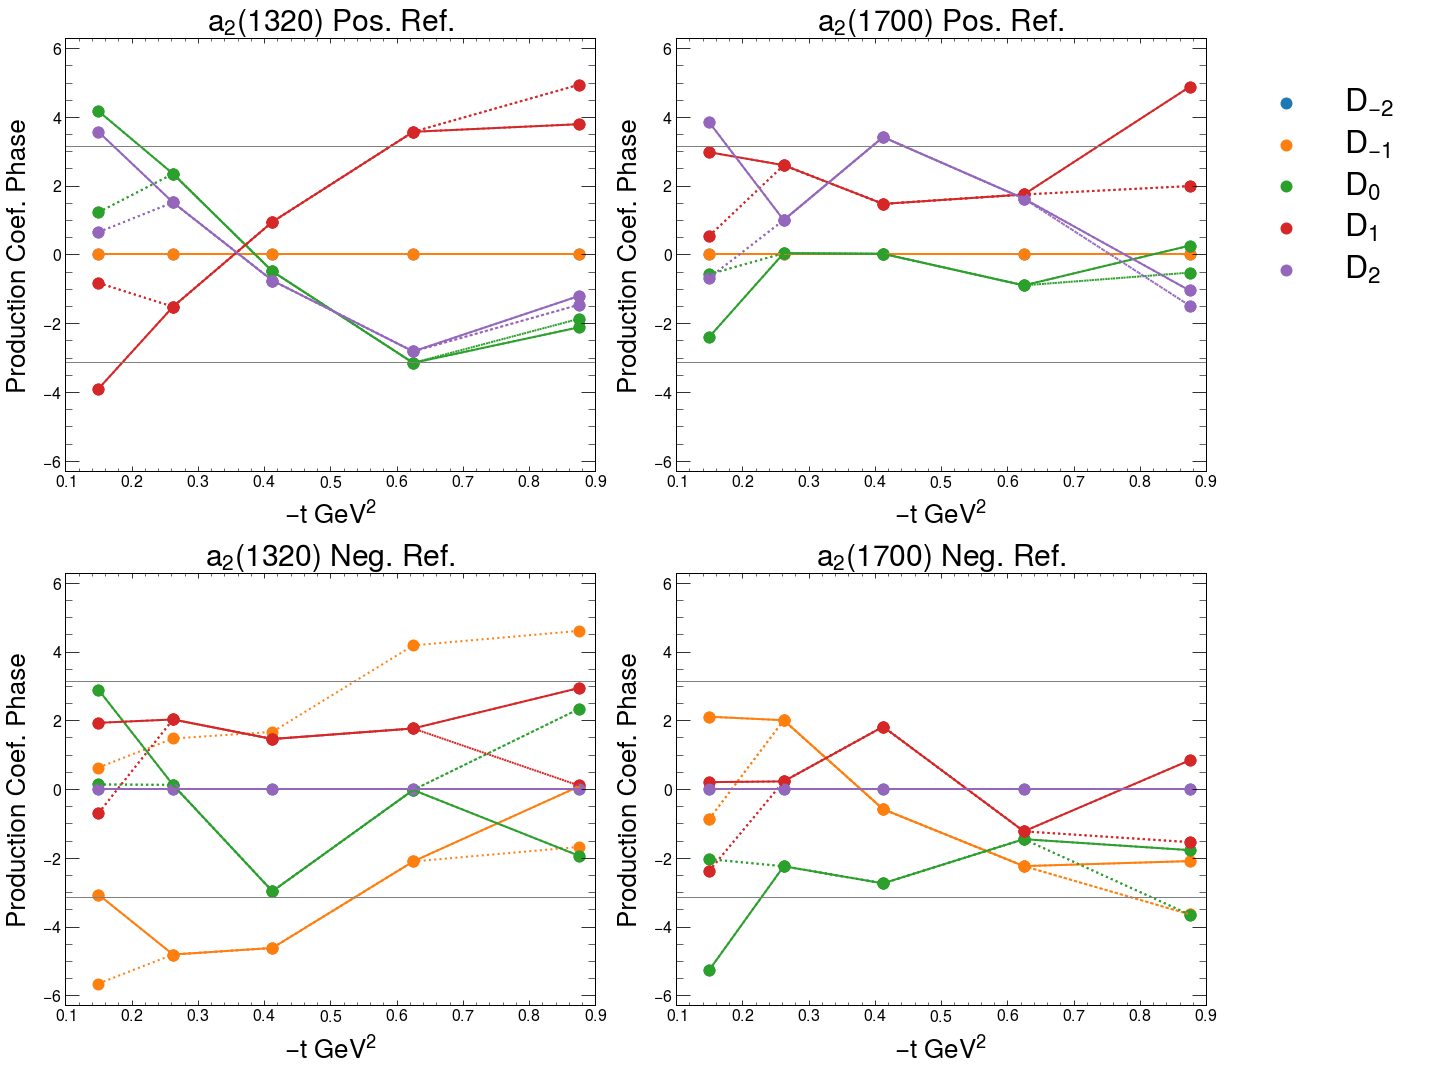

In [183]:
fig,ax=plt.subplots(2,2,figsize=(20,15))

color_waves=["D2-", "D1-", "D0+", "D1+", "D2+"]
cs=plt.rcParams['axes.prop_cycle'].by_key()['color']
cmap={color_waves[i]:cs[i] for i in range(len(color_waves))}

for wave in merged.keys():
#     if wave!='D0++':
#         continue
    usedMinDistances=set()
    for i,choice in enumerate(choices):
        useLabel = i==0
        minDistance=drawPhase(wave,choice,usedMinDistances,useLabel)
        usedMinDistances.add(minDistance)

for irow, rlabel in enumerate(['Pos. Ref.','Neg. Ref.']):
    for icol, clabel in enumerate([r'$a_2(1320)$',r'$a_2(1700)$']):
        ax[irow,icol].set_xlabel(r'$-t$ $GeV^2$',size=26)
        ax[irow,icol].set_ylabel('Production Coef. Phase',size=26)
        ax[irow,icol].set_title(f'{clabel} {rlabel}',size=30)
        ax[irow,icol].set_ylim(-2*np.pi,2*np.pi)
        ax[irow,icol].axhline(np.pi,c='gray',linewidth=1)
        ax[irow,icol].axhline(-np.pi,c='gray',linewidth=1)
ax[0,1].legend(prop={'size':32},bbox_to_anchor=(1,1))

plt.tight_layout()
plt.savefig('drawProductionCoeffs_v1.png')